## Observations and Insights

## Dependencies and starter code

In [43]:
# Homework sunmission for Mike Sammmis

# Submitted incomplete 10:36 PM Saturday 1/18/2020

# Ran out of time. Will start on assignments earlier from now on.


In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata = pd.DataFrame(mouse_metadata)
study_results = pd.DataFrame(study_results)

# Combine the data into a single dataset

merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [45]:

drug_group = merged_data.groupby(['Drug Regimen'])



In [46]:


mean1 = drug_group['Tumor Volume (mm3)'].mean()
median1 = drug_group['Tumor Volume (mm3)'].median() 
std1 = drug_group['Tumor Volume (mm3)'].std() 
var1 = drug_group['Tumor Volume (mm3)'].var()  
sem1 = drug_group['Tumor Volume (mm3)'].sem()

mean_df = pd.DataFrame(mean1)
mean_df.columns =['Mean Tumor Volume']

med_df = pd.DataFrame(median1)
med_df.columns =['Median Tumor Volume']

std_df = pd.DataFrame(std1)
std_df.columns =['Std Dev Tumor Volume']

var_df = pd.DataFrame(var1)
var_df.columns =['Variance Tumor Volume']

sem_df = pd.DataFrame(sem1)
sem_df.columns =['SEM Tumor Volume']

#frames=[mean_df,med_df,std_df,var_df,sem_df]

combined_df = pd.merge(mean_df, med_df, on='Drug Regimen', how='outer')
combined_df = pd.merge(combined_df, std_df, on='Drug Regimen', how='outer')
combined_df = pd.merge(combined_df, var_df, on='Drug Regimen', how='outer')
combined_df = pd.merge(combined_df, sem_df, on='Drug Regimen', how='outer')





## Summary statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

combined_df

,Mean Tumor Volume,Median Tumor Volume,Std Dev Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

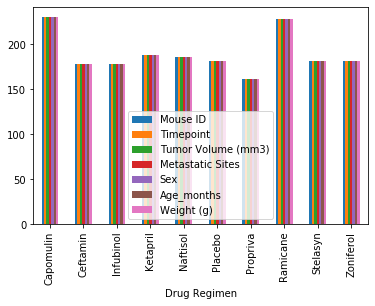

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen = merged_data.groupby(['Drug Regimen']).count()

regimen

#count_data_df = combined_df.count(['Drug Regimen'])

regimen.plot.bar()

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot



## Pie plots

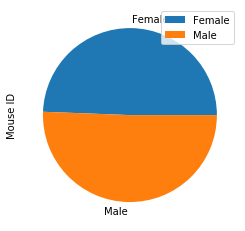

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = merged_data.groupby(['Sex']).count()


gender



gp = gender.plot.pie(y='Mouse ID')

#y='Sex',figsize=(5, 5)

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.



In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


# This code cribbed from Slack channe - Got a lot of help on this one from class........



df_2 = merged_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
capo = df_2.loc[df_2['Drug Regimen'] == 'Capomulin']
capo = capo.groupby("Mouse ID").tail(1)
print(capo)

quartiles = capo['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('Capomulin IQR')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

     Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
9        b128         45           38.982878    Capomulin
1680     j246         35           38.753265    Capomulin
1690     r554         45           32.377357    Capomulin
1700     s185         45           23.343598    Capomulin
1710     b742         45           38.939633    Capomulin
1720     x401         45           28.484033    Capomulin
1730     l509         45           41.483008    Capomulin
1740     s710         45           40.728578    Capomulin
1744     r157         15           46.539206    Capomulin
1754     u364         45           31.023923    Capomulin
1764     j119         45           38.125164    Capomulin
1774     v923         45           40.658124    Capomulin
1784     w914         45           36.041047    Capomulin
1794     i738         45           37.311846    Capomulin
1804     r944         45           41.581521    Capomulin
1814     y793         45           31.896238    Capomulin
1824     g316 

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen